In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/irish-dataset/irish.csv


In [2]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from collections import defaultdict
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("../input/irish-dataset/irish.csv")

In [4]:
data.shape

(150, 5)

In [5]:
data.head()

,sepal length,sepal width,petal length,petal width,flower type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,sepal length,sepal width,petal length,petal width,flower type
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
#Check the presence of missing values
data.isnull().any()

sepal length      False
sepal width       False
 petal length     False
petal width       False
 flower type      False
dtype: bool

In [8]:
#No of unique values in each column of the data in dataset
data.nunique()

sepal length      35
sepal width       23
 petal length     43
petal width       22
 flower type       3
dtype: int64

In [9]:
#Find non-numerical data in dataset
data.select_dtypes(exclude='number').columns

Index([' flower type'], dtype='object')

In [10]:
data.columns

Index(['sepal length', 'sepal width', ' petal length ', 'petal width',
       ' flower type'],
      dtype='object')

In [11]:
#Custom Mapping
data[' flower type'] = data[' flower type'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

In [12]:
data.head()

,sepal length,sepal width,petal length,petal width,flower type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 flower type
0    50
1    50
2    50
Name: count, dtype: int64


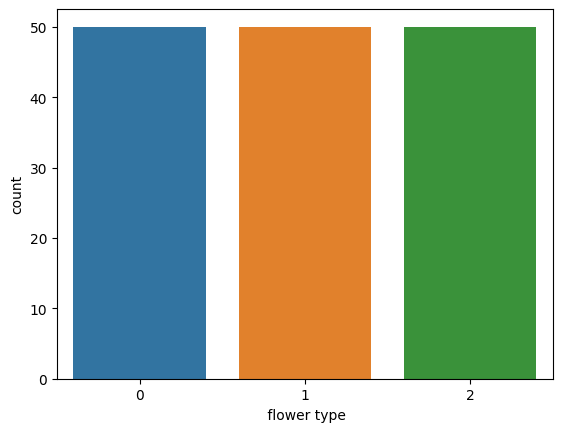

In [13]:
ax = sns.countplot(x=' flower type',data=data)
print(data[' flower type'].value_counts())

In [14]:

# Splitting features (X) and target variable (y)
X = data.iloc[:, :-1]  # Selecting all columns except the last one as features
y = data.iloc[:, -1]   # Selecting the last column as the target variable

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


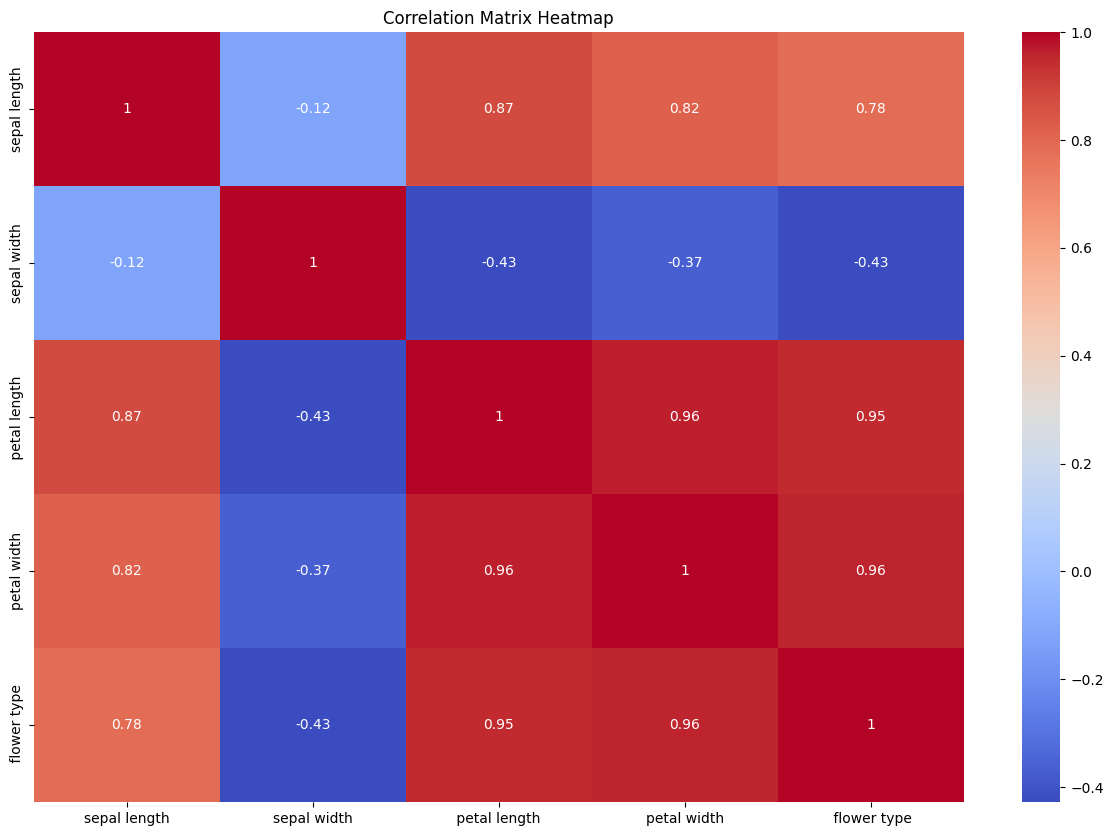

In [15]:
#Check for correlation

plt.figure(figsize = (15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

feature_train , feature_test, target_train, target_test = train_test_split(X, y,  test_size=0.3)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid)
grid_search.fit(feature_train, target_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters: ",best_params)

predictions = best_estimator.predict(feature_test)

lr_acc = accuracy_score(target_test,predictions)
print(confusion_matrix(target_test,predictions))
print(lr_acc)
print(classification_report(target_test,predictions))


Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
[[19  0  0]
 [ 0 11  0]
 [ 0  1 14]]
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier


feature_train , feature_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7]}

grid_search = GridSearchCV(knn, param_grid)

grid_search.fit(feature_train, target_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters: ",best_params)

predictions = best_estimator.predict(feature_test)
knn_acc = accuracy_score(target_test,predictions)
print(confusion_matrix(target_test,predictions))
print(knn_acc)
print(classification_report(target_test,predictions))

Best hyperparameters:  {'n_neighbors': 7}
[[14  0  0]
 [ 0 15  1]
 [ 0  0 15]]
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB

feature_train , feature_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

gnb = GaussianNB()

param_grid = {}

grid_search = GridSearchCV(gnb, param_grid)
grid_search.fit(feature_train, target_train)

print("Best hyperparameters: ", grid_search.best_params_)

best_gnb = grid_search.best_estimator_

predictions = best_gnb.predict(feature_test)
nbc_acc = accuracy_score(target_test,predictions)
print(confusion_matrix(target_test,predictions))
print(nbc_acc)
print(classification_report(target_test,predictions))

Best hyperparameters:  {}
[[16  0  0]
 [ 0 14  2]
 [ 0  1 12]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      0.88      0.90        16
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



SVM

In [20]:
from sklearn.svm import SVC

feature_train , feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2,random_state = 42)

svm = SVC()

param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(feature_train, target_train)

print("Best hyperparameters: ", grid_search.best_params_)

best_svm = grid_search.best_estimator_

predictions = best_svm.predict(feature_test)
svm_acc = accuracy_score(target_test,predictions)
print(confusion_matrix(target_test,predictions))
print(svm_acc)
print(classification_report(target_test,predictions))

Best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Decision Tree

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


param_grid={'criterion': ['gini', 'entropy'],
            'max_depth': ['None', 5, 10, 15]
            }


tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10)

feature_train , feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2,random_state = 0)


tree.fit(feature_train,target_train)
#tree_predictons=tree.predict_proba(feature_test)[:,1]

print("Best Parameter with Grid Search:",tree.best_params_)

best_dt = tree.best_estimator_

predictions = best_dt.predict(feature_test)
dt_acc = accuracy_score(target_test,predictions)

print(confusion_matrix(target_test,predictions))
print(dt_acc)
print(classification_report(target_test, predictions))

Best Parameter with Grid Search: {'criterion': 'entropy', 'max_depth': 5}
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Random Forest

Boosting

In [22]:
from sklearn.ensemble import AdaBoostClassifier

feature_train , feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada_classifier = AdaBoostClassifier()

grid_search = GridSearchCV(ada_classifier, param_grid)

grid_search.fit(feature_train,target_train)

print("Best parameters found: ", grid_search.best_params_)

prediction = grid_search.predict(feature_test)
boost_acc = accuracy_score(target_test, prediction)

print(confusion_matrix(target_test,prediction))

print(boost_acc)

print(classification_report(target_test, prediction))

Best parameters found:  {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200}
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Plot comparative graph for all ML Algorithms

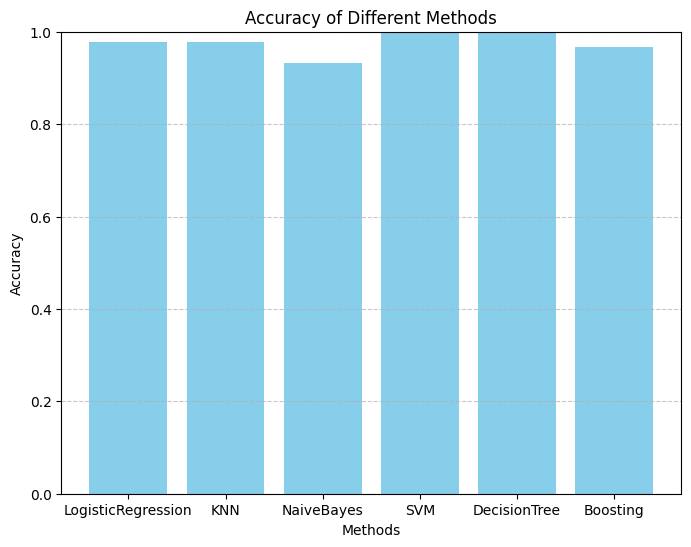

In [23]:
# Define the methods and their corresponding accuracies
methods = ['LogisticRegression', 'KNN', 'NaiveBayes', 'SVM', 'DecisionTree', 'Boosting']
accuracies = [lr_acc, knn_acc, nbc_acc, svm_acc, dt_acc, boost_acc]  # Example accuracies, replace with your actual data

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color='skyblue')

# Adding titles and labels
plt.title('Accuracy of Different Methods')
plt.xlabel('Methods')
plt.ylabel('Accuracy')

# Display the plot
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines
plt.show()

Conclusion: 

Among all methods SVM and Decision Tree give 100% accuracy.